# Housing Prices

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt

import scipy

import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df  = pd.read_csv(boston_url)


### Describing the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      **INDUS - proportion of non-retail business acres per town.**

·      **CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)**

·      **NOX - nitric oxides concentration (parts per 10 million)**

·      RM - average number of rooms per dwelling

·      **AGE - proportion of owner-occupied units built prior to 1940**

·      **DIS - weighted distances to five Boston employment centres**

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      **PTRATIO - pupil-teacher ratio by town**

·      LSTAT - % lower status of the population

·      **MEDV - Median value of owner-occupied homes in $1000'**

<br>

### Extra information
In the context of the Housing Prices of Boston dataset, the "proportion of owner-occupied units" refers to the fraction of housing units in a particular area (neighborhood or census tract) that are occupied by their owners. This is often expressed as a percentage.

High proportions of owner-occupied units in an area typically indicate a stable and established community where residents are more likely to have a long-term commitment to their homes. This can have an impact on the overall character and desirability of the neighborhood.

In datasets like the Boston Housing Prices dataset, this feature is one of several variables used to understand the factors that influence housing prices. Researchers and data analysts might use it to assess the relationship between the proportion of owner-occupied units and housing prices, as well as other socioeconomic and housing-related factors. It can provide insights into the housing market and the social dynamics of different neighborhoods within Boston.

In [2]:
## Get to know the dataset
display(boston_df.head(10))

print('Total of Charles River: ', boston_df.CHAS.sum())

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


Total of Charles River:  35.0


<br>

## Task 4: Generate Descriptive Statistics and Visualizations


Exploring the data set before Hypothesis Testing


### Median value of owner-occupied homes in $1000'

Using a boxplot, I see that the Median value of owner-occupied homes is 21.2 for Median value of owner-occupied homes in $1000' (MEDV variable) and is 77.5 for Proportion of owner-occupied units built prior to 1940 (AGE variable)

The Median values for MEDV follows a normal distribution


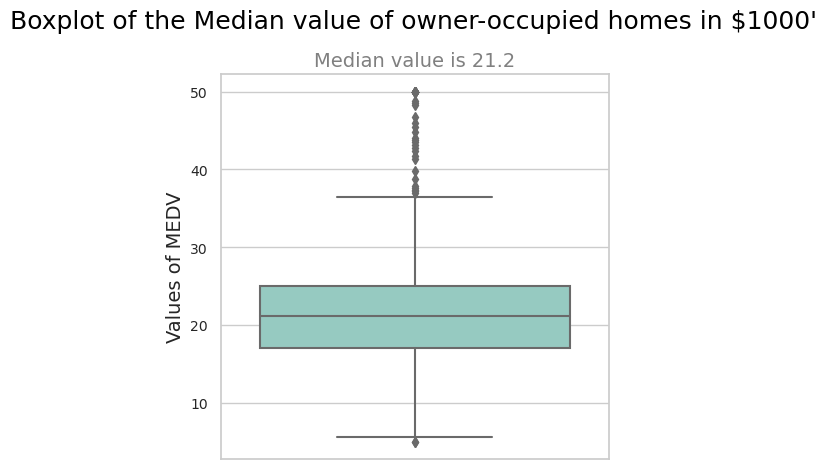

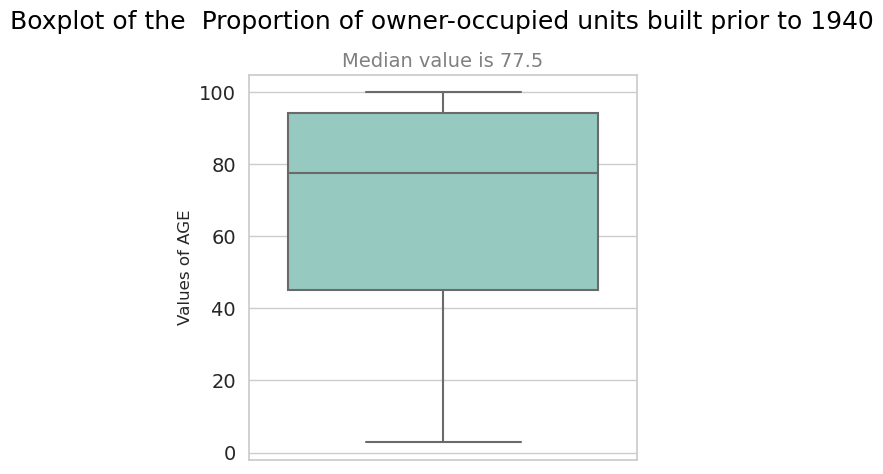

In [3]:
## Median value of  Median value of owner-occupied homes in $1000' --> MEDV
# Box plot


# Initialize the figure and axis
plt.figure(
    figsize=(5,5),  # Set the figure size here
    dpi=100         # Set the dpi (or resolution) here
)

# Create boxplot of MEDV variable
sns.boxplot(
    y = boston_df.MEDV,
    palette = "Set3"
) 

# Set the main title
plt.suptitle(
    "Boxplot of the Median value of owner-occupied homes in $1000'",  # Main title text
    fontsize=18,    # Set the font size
    color="black",  # Set the color
    x=0.51,         # Adjust this to align with the subtitle
    y=1.01,         # Adjust this to align with the subtitle
)

# Set the subtitle
plt.title(
    "Median value is "+str(np.median(boston_df.MEDV)),  # Subtitle text
    fontsize=14,                                        # Set the font size
    color="grey",                                       # Set the color
)

# Set axis labels
#plt.xlabel("Boxplot", fontsize=12)        # Set the x-axis label and fontsize
#plt.xticks(fontsize=10)                   # Set the font size of the x-axis ticks
plt.ylabel("Values of MEDV", fontsize=14)  # Set the y-axis label and fontsize
plt.yticks(fontsize=10)                    # Set the font size of the y-axis ticks

# Show the plot
plt.show()



## Median value of  Proportion of owner-occupied units built prior to 1940  --> AGE

# Initialize the figure of the plot and axis
plt.figure(
    figsize=(5,5),  # Set thye figure size here
    dpi=100         # Set the dpi (or resolution) here
)

# Create boxplot of AGE variable
sns.boxplot(
    y = boston_df.AGE,
    palette = 'Set3'
)

# Set main title
plt.suptitle(
    "Boxplot of the  Proportion of owner-occupied units built prior to 1940",  # Main title
    fontsize=18,    # Set font size
    color='black',  # Set font color
    x=0.51,         # Adjust this to align with the subtitle
    y=1.01,         # Adjust this to align with the subtitle
)

# Set subtitle
plt.title(
    "Median value is "+str(np.median(boston_df.AGE)),   # Subtitle text
    fontsize=14,                                       # Set the font size
    color="grey",                                      # Set the color
)

# Set axis labels
#plt.xlabel("Boxplot", fontsize=12)      # Set the x-axis label and font size
#plt.xticks(fontsize=10)                 # Set the font size of the x-axis ticks
plt.ylabel('Values of AGE')              # Set the y-axis label and font size
plt.yticks(fontsize=14)                  # Set the font size of the y-axis ticks

# Show the plot
plt.show()

### Amount of Charles River bounding
Using a bar plot, I see that bounded by Charles River are 35 houses

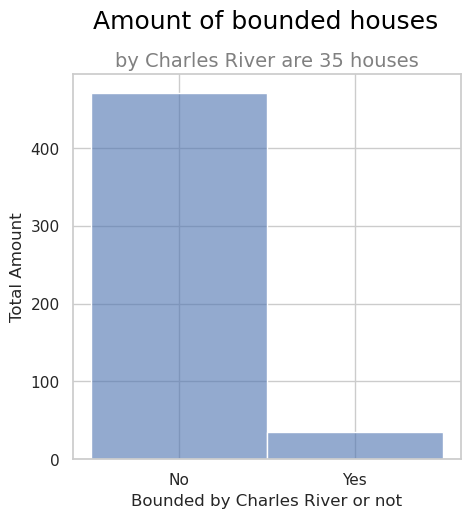

In [4]:
## bar plot for the Charles river variable  -- makes no sense, but I did anyways -- histogram makes more sense

# First make CHAS as integer values
boston_df = boston_df.astype({'CHAS':'int64'})

# Second, use 1 as Yes and 0 as No for a new variable called CategoriesCHAS
boston_df['CategoriesCHAS'] = 'Yes'
boston_df.loc[ boston_df['CHAS']==0 ,['CategoriesCHAS']] = 'No'


#print('Total of Charles River: ', boston_df.CHAS.sum())

# Add column of ones
boston_df['Count'] = 1

#display(boston_df)

# Initialize the figure of the plot and axis
plt.figure(
    figsize=(5,5),  # Set thye figure size here
    dpi=100         # Set the dpi (or resolution) here
)

# Create barplot of CHAS variable

g = sns.histplot(
    x='CategoriesCHAS',
    #x='CHAS',
    data=boston_df,
    alpha=.6
)

# Set x-ticks
g.set_xticks(range(len(boston_df.CHAS.unique())))      # <--- set amount of ticks first
g.set_xticklabels(boston_df.CategoriesCHAS.unique())


# Superior Title
plt.suptitle(
    "Amount of bounded houses",  # Main title
    fontsize=18,    # Set font size
    color='black',  # Set font color
    x=0.51,         # Adjust this to align with the subtitle
    y=1.01,         # Adjust this to align with the subtitle
)

# Subtitle
plt.title(
    "by Charles River are "+str(boston_df.CHAS.sum())+ " houses",   # Subtitle text
    fontsize=14,                                       # Set the font size
    color="grey",                                      # Set the color
)

# add labels and title

plt.xlabel("Bounded by Charles River or not")

plt.ylabel("Total Amount")

plt.show()

### MEDV versus AGE

Using a boxplot, I see that the Median value of owner-occupied homes is probably equal between groups of AGEs

Median values of MEDV doesn't seem to be different amoung AGE Groups, even though for older than 70 years data seems to be more broad

,AGE,AGE_Groups
0,65.2,between 35 and 70 years
1,78.9,70 years and older
2,61.1,between 35 and 70 years
3,45.8,between 35 and 70 years
4,54.2,between 35 and 70 years


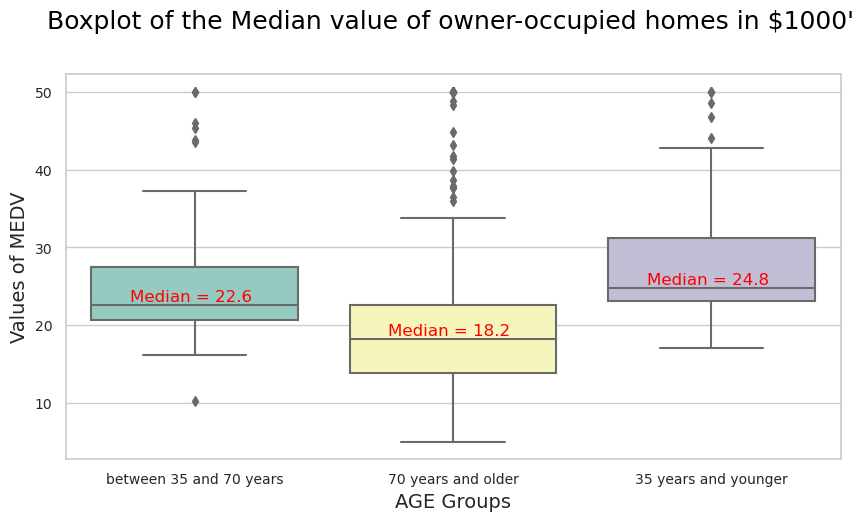

In [5]:
## boxplot for the MEDV variable vs the AGE variable

# First discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
# Then, there will be 3 groups of AGE variable
boston_df.loc[ (boston_df['AGE']<=35), ['AGE_Groups']] = '35 years and younger'
boston_df.loc[ (boston_df['AGE']>=70), ['AGE_Groups']] = '70 years and older'
boston_df.loc[ (boston_df['AGE']>35)&(boston_df['AGE']<70), ['AGE_Groups']] = 'between 35 and 70 years'


# Median MEDV by AGE Group
medianMEDV_group1 = np.median( boston_df.loc[ (boston_df['AGE_Groups']=='between 35 and 70 years') , ['MEDV']] )
medianMEDV_group2 = np.median( boston_df.loc[ (boston_df['AGE_Groups']=='70 years and older'     ) , ['MEDV']] )
medianMEDV_group3 = np.median( boston_df.loc[ (boston_df['AGE_Groups']=='35 years and younger'   ) , ['MEDV']] )

# Creating DataFrame
df_MEDVbyAGE = pd.DataFrame({
                            'AGE_Groups':  ['between 35 and 70 years',  '70 years and older',  '35 years and younger'],
                            'Median MEDV': [medianMEDV_group1,          medianMEDV_group2,     medianMEDV_group3]
})


display(boston_df[['AGE','AGE_Groups']].head(5))
print('\n\n')

# Make boxplot of MEDV separated into 3 AGE groups


# Initialize the figure of the plot and axis
ax = plt.figure(
    figsize=(10,5),  # Set thye figure size here
    dpi=100         # Set the dpi (or resolution) here
)

# Create boxplot of MEDV variable
ax = sns.boxplot(
    x=boston_df.AGE_Groups, y = boston_df.MEDV,
    palette = "Set3"
) 

# Text annotation of Median values for each AGE Group
ax.text(-0.25, medianMEDV_group1+0.5, "Median = "+str(medianMEDV_group1), color = "red" ) 
ax.text( 0.75, medianMEDV_group2+0.5, "Median = "+str(medianMEDV_group2), color = "red" ) 
ax.text( 1.75, medianMEDV_group3+0.5, "Median = "+str(medianMEDV_group3), color = "red" ) 

# Set the main title
plt.suptitle(
    "Boxplot of the Median value of owner-occupied homes in $1000'",  # Main title text
    fontsize=18,    # Set the font size
    color="black",  # Set the color
    x=0.51,         # Adjust this to align with the subtitle
    y=1.01,         # Adjust this to align with the subtitle
)


# Set axis labels
plt.xlabel("AGE Groups", fontsize=14)        # Set the x-axis label and fontsize
plt.xticks(fontsize=10)                   # Set the font size of the x-axis ticks
plt.ylabel("Values of MEDV", fontsize=14)  # Set the y-axis label and fontsize
plt.yticks(fontsize=10)                    # Set the font size of the y-axis ticks

# Show the plot
plt.show()

### Relationship between NOX and INDUS

Using scatter plot, explore the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Apparently, where Nitric oxide concentrations (NOX) are low, seems to have less non-retail business acres per town (INDUS).<br>
However, where INDUS is between 18 and 20, we can see a range for NOX (from 0.6 to 0.75) and when is over 20 NOX bounces around 0.6

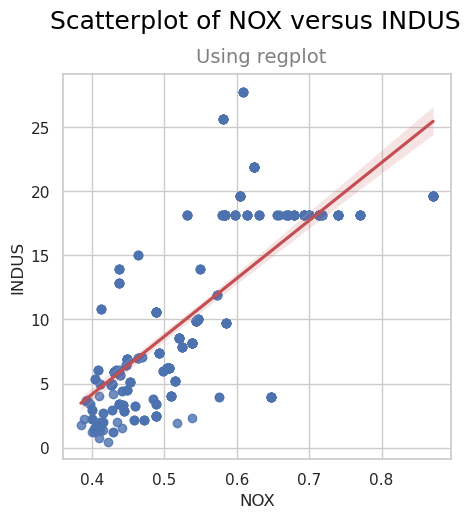

In [6]:
## scatter plot to show the relationship between NOX (Nitric oxide concentrations) and INDUS (the proportion of non-retail business acres per town)

# Initialize the figure and axis
plt.figure(
    figsize=(5,5),  # Set the figure size here
    dpi=100         # Set the dpi (or resolution) here
)

# Create scatterplot of MEDV variable
sns.regplot(
    data = boston_df,
    x = 'NOX',
    y = 'INDUS',
    line_kws=dict(color="r")
) 

# Set the main title
plt.suptitle(
    "Scatterplot of NOX versus INDUS",  # Main title text
    fontsize=18,    # Set the font size
    color="black",  # Set the color
    x=0.51,         # Adjust this to align with the subtitle
    y=1.01,         # Adjust this to align with the subtitle
)

# Set subtitle
plt.title(
    "Using regplot",  # Main title text
    fontsize=14,    # Set the font size
    color="gray",  # Set the color
    x=0.51,         # Adjust this to align with the subtitle
    y=1.01,         # Adjust this to align with the subtitle
)

# Show the plot
plt.show()

### Distribution of PTRATIO

Create a histogram for the pupil to teacher ratio variable

It seems that is common to have 21 students per teacher in the public schools of Boston

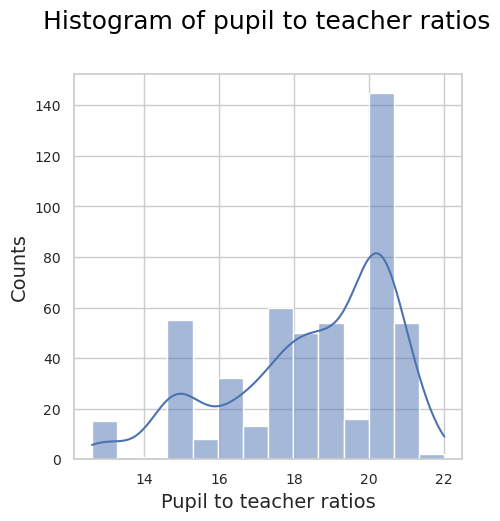

In [7]:
## histogram to show the distribution of the pupil to teacher ratio variable  PTRATIO

# Initialize the figure of the plot and axis
plt.figure(
    figsize=(5,5),  # Set thye figure size here
    dpi=100         # Set the dpi (or resolution) here
)

# Histogram of putil to teacher ratio variable
sns.histplot(x=boston_df.PTRATIO, kde=True)


# Set the main title
plt.suptitle(
    "Histogram of pupil to teacher ratios",  # Main title text
    fontsize=18,    # Set the font size
    color="black",  # Set the color
    x=0.51,         # Adjust this to align with the subtitle
    y=1.01,         # Adjust this to align with the subtitle
)


# Set axis labels
plt.xlabel("Pupil to teacher ratios", fontsize=14)        # Set the x-axis label and fontsize
plt.xticks(fontsize=10)                   # Set the font size of the x-axis ticks
plt.ylabel("Counts", fontsize=14)  # Set the y-axis label and fontsize
plt.yticks(fontsize=10)                    # Set the font size of the y-axis ticks


plt.show()

. . . . . .

### Summazing insights

- Median value of owner-occupied homes in $1000' (MEDV variable) is 21.2

- What was bounded by Charles River sums to 35 (houses?)

- Median values of MEDV doesn't seem to be different amoung AGE Groups, even though for older than 70 years data seems to be more broad

- Apparently, where Nitric oxide concentrations (NOX) are low, seems to have less non-retail business acres per town (INDUS).<br> However, where INDUS is between 18 and 20, we can see a range for NOX (from 0.6 to 0.75) and when is over 20 NOX bounces around 0.6

- It seems that is common to have 21 students per teacher in the public schools of Boston

---------------------

<br>

## Task 5: Use the appropriate tests to answer the questions provided

<br>

Perform Hypothesis Testing using:

α = 0.05

### Significant difference in Median value of owner-occupied homes in $1000' for Charles River or not bounding?

Hypotheses:
- H0 : There **is no** significant difference in median value of houses being bounded by Charler River or not 
- HA : There **is** significant difference in median value of houses being bounded by Charler River or not 

Using T-test for independent samples, verify p_value against α = 0.05

In [8]:
#significance level of 5%
alphasig = 0.05

# T-test using scipy library
ttst = scipy.stats.ttest_ind(
    boston_df[ boston_df['CHAS']==1]['MEDV'],
    boston_df[ boston_df['CHAS']==0]['MEDV'],
    equal_var=True
)

# Results
print(
    "Statistic: {0},  p_value: {1} \n".format(ttst[0] , ttst[1]),
    "p_value > 0.05" if ttst[1] > alphasig else "p_value <= 0.05"
)

Statistic: 3.996437466090509,  p_value: 7.390623170519905e-05 
 p_value <= 0.05


<br>

**Conclusion**: Since p_value < 0.05 (significance level) we reject null hypothesis, concluding that houses bounded by Charles River median values differ from the non bounded by Charles River houses.

----------------------------

<br>

### Significant difference in Median value of owner-occupied homes in $1000' for each proportion of owner occupied units built prior to 1940 (AGE)?

Hypotheses:
- H0 : There **is no** significant difference in median value of houses by AGE Groups
- HA : There **is** significant difference in median value of houses by AGE Groups

Using ANOVA of one way with the above 3 AGE Groups defined (  AGE <= 35  ,  35 < AGE < 79  ,  AGE > 70  ), verify p_value against α = 0.05

In [10]:
# significance level of 5%
alphasig = 0.05


# ANOVA of one way using scipy library
anovatst = scipy.stats.f_oneway(
    boston_df[ boston_df['AGE_Groups'] == '35 years and younger'   ]['MEDV'],
    boston_df[ boston_df['AGE_Groups'] == '70 years and older'     ]['MEDV'],
    boston_df[ boston_df['AGE_Groups'] == 'between 35 and 70 years']['MEDV']
)

# Results
print(
    "F_Statistic: {0},  p_value: {1} \n".format(anovatst[0] , anovatst[1]),
    "p_value > 0.05" if anovatst[1] > alphasig else "p_value <= 0.05"
)

F_Statistic: 36.40764999196599,  p_value: 1.7105011022702984e-15 
 p_value <= 0.05


<br>

**Conclusion**: Since p_value < 0.05 (significance level) we reject null hypothesis, concluding that median values of houses differ by AGE Groups

----------------------------

<br>


### Significant relationship between  Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS) ? 

Hypotheses:
- H0 : There **is no** significant Pearson correlation between NOX and INDUS
- HA : There **is** significant Pearson correlation between NOX and INDUS

Using Pearson correlation, verify p_value against α = 0.05

In [11]:
# significance level of 5%
alphasig = 0.05


# Pearson correlation using scipy library
peacorr = scipy.stats.pearsonr(
    boston_df['NOX'],
    boston_df['INDUS']
)

# Results
print(
    "Statistic: {0},  p_value: {1} \n".format(peacorr[0] , peacorr[1]),
    "p_value > 0.05" if peacorr[1] > alphasig else "p_value <= 0.05"
)

Statistic: 0.7636514469209151,  p_value: 7.913361061238693e-98 
 p_value <= 0.05


<br>

**Conclusion**: Since p_value < 0.05 (significance level) we reject null hypothesis, concluding that there is significant Pearson correlation between NOX and INDUS

----------------------------

<br>



### Significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

Hypotheses:
- H0 : There **is no** significant impact in median value of houses depending on  distance to the five Boston employment centres
- HA : There **is** significant impact in median value of houses depending on  distance to the five Boston employment centres

Using Regression Analysis, verify p_value against α = 0.05

In [12]:
# significance level of 5%
alphasig = 0.05


# Regression Analysis using scipy library
X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']

model = sm.OLS( y, X).fit()
predictions = model.predict(X)

display(model.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        15:40:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

**Conclusion**: Since Prob (F-statistic) which is p_value < 0.05 (significance level) we reject null hypothesis, concluding that median values of houses are impacted by the distance to the five Boston employment centres

----------------------